## 📊 Define Function to Load and Compute MAE

- This section focuses on defining a function to:
  - Load the dataset required for evaluation.
  - Compute Mean Absolute Error (MAE) as a metric.
- MAE is crucial for assessing the performance of our election prediction models.


## 🛠️ Import Libraries and Setup

This section includes importing necessary libraries and defining helper functions for the Mean Absolute Error (MAE) calculation.

In [38]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import sys
import os

In [29]:
def load_results_and_compute_mae(model_name):
    """
    Load predictions, true values, and MAE for a given model to compute the overall MAE.

    Parameters:
    - model_name (str): Name of the model whose results are to be evaluated.

    Returns:
    - overall_mae (float): Overall Mean Absolute Error for the model.
    - state_to_pred (dict): Predictions for each state and year.
    - state_to_true (dict): Actual values for each state and year.
    """
    # Adjust path to match the provided directory structure
    base_path = "./dataset"

    # Load model predictions
    pred_file = f"{base_path}/{model_name}_pred.json"
    with open(pred_file, 'r') as file:
        state_to_pred = json.load(file)
    print(f"Loaded predictions from {pred_file}: {state_to_pred}")

    # Load actual values
    true_file = f"{base_path}/{model_name}_true.json"
    with open(true_file, 'r') as file:
        state_to_true = json.load(file)
    print(f"Loaded actual values from {true_file}: {state_to_true}")

    # Load state-wise MAE data
    mae_file = f"{base_path}/{model_name}_mae.json"
    with open(mae_file, 'r') as file:
        state_to_mae = json.load(file)
    print(f"Loaded MAE data from {mae_file}: {state_to_mae}")

    # Initialize variables for overall MAE calculation
    total_mae_sum = 0  # Sum of all MAE values
    total_entries = 0  # Count of all MAE entries

    # Aggregate MAE across all states and years
    for state, mae_years in state_to_mae.items():
        for year, mae in mae_years.items():
            total_mae_sum += mae
            total_entries += 1

    # Calculate overall MAE
    overall_mae = total_mae_sum / total_entries
    return overall_mae, state_to_pred, state_to_true

## 📋 Generate Classification Reports

This section defines a function to create detailed classification reports, helping to evaluate model performance at a granular level.


In [30]:
def generate_classification_report(model_name, state_to_pred, state_to_true, overall_mae):
    """
    Generate a classification report and save it as a text file.

    Parameters:
    - model_name (str): Name of the model being evaluated.
    - state_to_pred (dict): Dictionary containing model predictions by state and year.
    - state_to_true (dict): Dictionary containing actual values by state and year.
    - overall_mae (float): Computed overall Mean Absolute Error for the model.

    Returns:
    - report (str): Classification report as a string.
    """
    y_true = []  # List to store actual winners
    y_pred = []  # List to store predicted winners

    # Collect predictions
    for state, results in state_to_pred.items():
        for year, predicted_winner in results.items():
            y_pred.append(predicted_winner)

    # Collect actual values
    for state, results in state_to_true.items():
        for year, actual_winner in results.items():
            y_true.append(actual_winner)

    # Generate the classification report
    report = classification_report(y_true, y_pred, zero_division=0)

    # Save the report along with MAE to a text file
    report_file = f"reports/{model_name}_classification_report.txt"
    with open(report_file, "w") as file:
        file.write(f"MAE: {overall_mae}\n\n")  # Append MAE at the top
        file.write(report)

    print(f"Classification report and MAE saved to '{report_file}'")
    return report

## 🔄 Evaluate Models and Generate Reports

This section evaluates all models by computing metrics such as Mean Absolute Error (MAE) and generating classification reports.  
It consolidates the results to assess model performance comprehensively.

In [32]:
# 🔄 Generate Reports for All Models

# List of models to evaluate
models = ["LinearRegression", "RandomForest", "DecisionTree", "XGBoost"]

# Iterate over each model
for model_name in models:
    print(f"Processing model: {model_name}...")

    # Load results and compute MAE
    overall_mae, state_to_pred, state_to_true = load_results_and_compute_mae(model_name)
    print(f"Overall MAE for {model_name}: {overall_mae}")

    # Generate and save the classification report
    report = generate_classification_report(model_name, state_to_pred, state_to_true, overall_mae)
    if report:
        print(f"Classification report and MAE saved for model: {model_name}\n")
    else:
        print(f"No data available for generating the report for model: {model_name}\n")

Processing model: LinearRegression...
Loaded predictions from /content/results/LinearRegression_pred.json: {'Alabama': {'2008': 'REP', '2012': 'REP', '2016': 'REP', '2020': 'REP'}, 'Alaska': {'2008': 'REP', '2016': 'REP', '2020': 'REP'}, 'Arizona': {'2008': 'REP', '2012': 'REP', '2016': 'REP', '2020': 'REP'}, 'Arkansas': {'2008': 'REP', '2012': 'REP', '2016': 'REP', '2020': 'REP'}, 'California': {'2008': 'DEM', '2012': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Colorado': {'2008': 'REP', '2012': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Connecticut': {'2008': 'DEM', '2012': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Delaware': {'2008': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Florida': {'2008': 'REP', '2012': 'DEM', '2016': 'REP', '2020': 'REP'}, 'Georgia': {'2008': 'REP', '2012': 'DEM', '2016': 'REP', '2020': 'REP'}, 'Hawaii': {'2008': 'DEM', '2012': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Idaho': {'2008': 'REP', '2012': 'REP', '2016': 'REP', '2020': 'REP'}, 'Illinois': {'2008': 'DEM', '2012': 'DEM

In [33]:
# List of models to evaluate
models = ["LinearRegression", "RandomForest", "DecisionTree", "XGBoost"]

# Loop through each model and evaluate
for model_name in models:
    print(f"Evaluating {model_name}...")

    # Load results and compute MAE
    overall_mae, state_to_pred, state_to_true = load_results_and_compute_mae(model_name)

    # Generate classification report
    report = generate_classification_report(model_name, state_to_pred, state_to_true, overall_mae)

    # Print results
    print(f"Model: {model_name}")
    print(f"Overall MAE: {overall_mae}")
    print("Classification Report:")
    print(report)

    # Save classification report and MAE to a file
    with open(f"reports/{model_name}_classification_report.txt", 'w') as f:
        f.write(f"Model: {model_name}\nOverall MAE: {overall_mae}\nClassification Report:\n{report}\n")

    print("\n")

Evaluating LinearRegression...
Loaded predictions from /content/results/LinearRegression_pred.json: {'Alabama': {'2008': 'REP', '2012': 'REP', '2016': 'REP', '2020': 'REP'}, 'Alaska': {'2008': 'REP', '2016': 'REP', '2020': 'REP'}, 'Arizona': {'2008': 'REP', '2012': 'REP', '2016': 'REP', '2020': 'REP'}, 'Arkansas': {'2008': 'REP', '2012': 'REP', '2016': 'REP', '2020': 'REP'}, 'California': {'2008': 'DEM', '2012': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Colorado': {'2008': 'REP', '2012': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Connecticut': {'2008': 'DEM', '2012': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Delaware': {'2008': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Florida': {'2008': 'REP', '2012': 'DEM', '2016': 'REP', '2020': 'REP'}, 'Georgia': {'2008': 'REP', '2012': 'DEM', '2016': 'REP', '2020': 'REP'}, 'Hawaii': {'2008': 'DEM', '2012': 'DEM', '2016': 'DEM', '2020': 'REP'}, 'Idaho': {'2008': 'REP', '2012': 'REP', '2016': 'REP', '2020': 'REP'}, 'Illinois': {'2008': 'DEM', '2012': 'DEM', '201

## 📊 Visualization of Model Performance

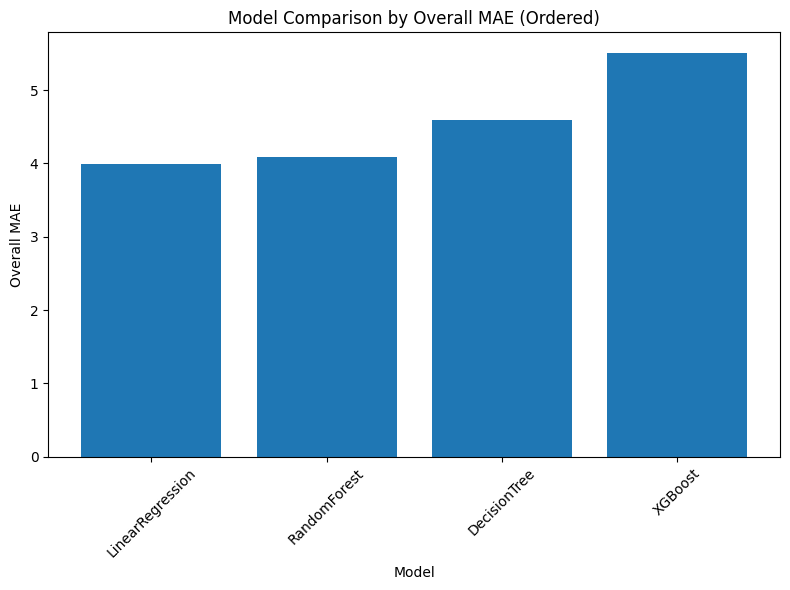

In [39]:
# Suppress stdout
class suppress_stdout:
    def __enter__(self):
        self._original_stdout = sys.stdout  # Save the original stdout
        sys.stdout = open(os.devnull, 'w')  # Redirect stdout to devnull
    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout = self._original_stdout  # Restore the original stdout

# Dictionary to store MAE for each model
model_mae = {}

# Loop through each model and compute its MAE
for model_name in models:
    with suppress_stdout():
        overall_mae, _, _ = load_results_and_compute_mae(model_name)
    model_mae[model_name] = overall_mae

# Sort models by MAE value (ascending order)
sorted_model_mae = dict(sorted(model_mae.items(), key=lambda item: item[1]))

# Plotting the comparison of models by Overall MAE
plt.figure(figsize=(8, 6))

# Create bar chart with sorted MAE values
plt.bar(sorted_model_mae.keys(), sorted_model_mae.values())

# Adding labels and title to the plot
plt.xlabel("Model")
plt.ylabel("Overall MAE")
plt.title("Model Comparison by Overall MAE (Ordered)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label clipping
plt.tight_layout()

# Show the plot
plt.show()